In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_parquet('E:/bd_project/data.parquet')

In [3]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,day_name,day,month,year,month_day,year_month,year_month_day,season,season_name,is_weekend,is_holiday,distance,duration,duration_hours,duration_minutes,duration_minutes_total,duration_seconds,money,date,price
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,D7B83767088171F9,electric_bike,2020-08-01 00:15:48,2020-08-01 00:30:55,Wood St & Augusta Blvd,Michigan Ave & Washington St,41.899158,-87.672179,41.884368,-87.624721,member,61.0,23.8675,20.417501,22.109169,25.831486,21.518055,23.571420,51802.430,2624.9004,4.5,4.5,0.0,8.0,4.472136,Saturday,1,8,2020,08-01,2020-08,2020-08-01,3,Осень,1,0,4.258662,0 days 00:15:07,0,15,15,7,2.70,2020-08-01,1.80
1,BB98E49950B2E6B2,electric_bike,2020-08-01 00:17:37,2020-08-01 00:26:13,Damen Ave & Pierce Ave,Greenview Ave & Fullerton Ave,41.909294,-87.677746,41.925424,-87.665858,casual,61.0,23.8675,20.417501,22.109169,25.831486,21.518055,23.571420,51802.430,2624.9004,4.5,4.5,0.0,8.0,4.472136,Saturday,1,8,2020,08-01,2020-08,2020-08-01,3,Осень,1,0,2.045510,0 days 00:08:36,0,8,8,36,4.52,2020-08-01,4.20
2,96AE5D4511345FF9,electric_bike,2020-08-01 00:23:00,2020-08-01 00:26:33,<NA>,<NA>,42.020000,-87.710000,42.020000,-87.710000,member,61.0,23.8675,20.417501,22.109169,25.831486,21.518055,23.571420,51802.430,2624.9004,4.5,4.5,0.0,8.0,4.472136,Saturday,1,8,2020,08-01,2020-08,2020-08-01,3,Осень,1,0,0.000000,0 days 00:03:33,0,3,3,33,0.54,2020-08-01,0.36
3,5055BD1A9218BE36,electric_bike,2020-08-01 00:23:46,2020-08-01 01:13:41,Troy St & Elston Ave,California Ave & Altgeld St,41.945238,-87.706677,41.926695,-87.697797,member,61.0,23.8675,20.417501,22.109169,25.831486,21.518055,23.571420,51802.430,2624.9004,4.5,4.5,0.0,8.0,4.472136,Saturday,1,8,2020,08-01,2020-08,2020-08-01,3,Осень,1,0,2.188823,0 days 00:49:55,0,49,49,55,8.82,2020-08-01,5.88
4,145195A28E344DF4,electric_bike,2020-08-01 00:37:14,2020-08-01 00:46:05,Sheffield Ave & Wellington Ave,Broadway & Sheridan Rd,41.936409,-87.652531,41.952826,-87.650091,casual,61.0,23.8675,20.417501,22.109169,25.831486,21.518055,23.571420,51802.430,2624.9004,4.5,4.5,0.0,8.0,4.472136,Saturday,1,8,2020,08-01,2020-08,2020-08-01,3,Осень,1,0,1.836585,0 days 00:08:51,0,8,8,51,4.52,2020-08-01,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17698703,FA27360C954EA790,electric_bike,2024-03-31 23:43:55,2024-03-31 23:46:36,Ashland Ave & 13th St,<NA>,41.865281,-87.666501,41.860000,-87.660000,member,63.0,5.9675,2.317500,4.219583,3.060606,-1.628764,0.367853,45699.516,28801.9360,8.7,8.7,0.0,6.0,6.603787,Sunday,31,3,2024,03-31,2024-03,2024-03-31,2,Лето,1,0,0.796687,0 days 00:02:41,0,2,2,41,0.36,2024-03-31,0.34
17698704,F3DEA9C1CA0B1CBB,electric_bike,2024-03-31 23:52:20,2024-03-31 23:57:00,Lincoln Ave & Roscoe St*,Clark St & Grace St,41.943303,-87.670881,41.950780,-87.659172,member,63.0,5.9675,2.317500,4.219583,3.060606,-1.628764,0.367853,45699.516,28801.9360,8.7,8.7,0.0,6.0,6.603787,Sunday,31,3,2024,03-31,2024-03,2024-03-31,2,Лето,1,0,1.276318,0 days 00:04:40,0,4,4,40,0.72,2024-03-31,0.68
17698705,CECBE23FF429CB28,classic_bike,2024-03-31 23:54:44,2024-04-01 00:08:37,Racine Ave & 35th St,Racine Ave & 18th St,41.830689,-87.656211,41.858166,-87.656495,member,63.0,5.9675,2.317500,4.219583,3.060606,-1.628764,0.367853,45699.516,28801.9360,8.7,8.7,0.0,6.0,6.603787,Sunday,31,3,2024,03-31,2024-03,2024-03-31,2,Лето,1,0,3.055442,0 days 00:13:53,0,13,13,53,0.00,2024-03-31,0.00


In [3]:
df = df[df['rideable_type'] != 'docked_bike']

In [3]:
df = df[df['member_casual'] == 'casual']
df = df[df['rideable_type'] != 'docked_bike']
df['hour'] = df['started_at'].dt.hour

<Axes: xlabel='hour', ylabel='Count'>

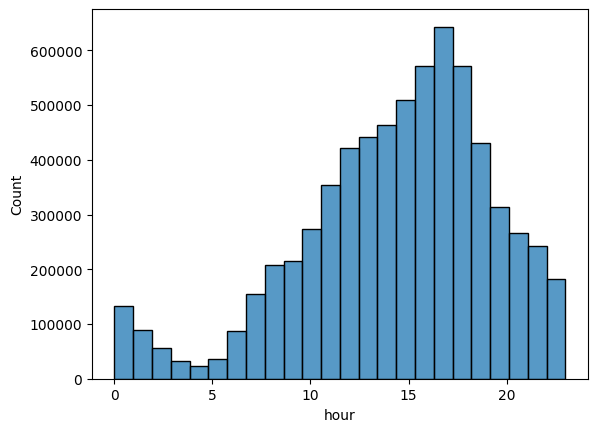

In [4]:
sns.histplot(data=df, x='hour', bins=24)

<Axes: xlabel='hour', ylabel='Count'>

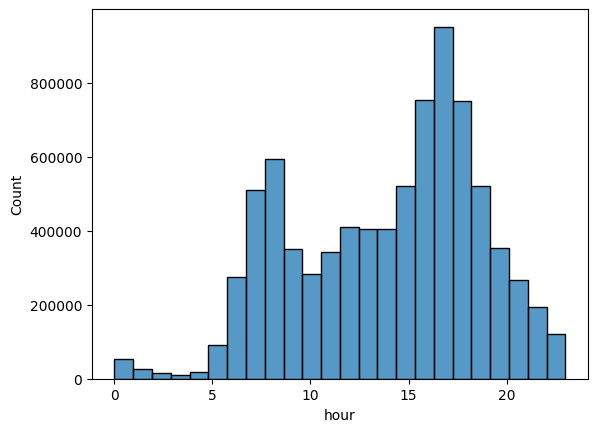

In [5]:
df = df[df['member_casual'] == 'member']
df['hour'] = df['started_at'].dt.hour
df = df[(df['day_name'] != 'Sunday') & (df['day_name'] != 'Saturday')]

sns.histplot(data=df, x='hour', bins=24)

In [51]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'weather_code',
       'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'apparent_temperature_mean', 'daylight_duration', 'sunshine_duration',
       'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours',
       'wind_speed_10m_max', 'day_name', 'day', 'month', 'year', 'month_day',
       'year_month', 'year_month_day', 'season', 'season_name', 'is_weekend',
       'is_holiday', 'distance', 'duration', 'duration_hours',
       'duration_minutes', 'duration_minutes_total', 'duration_seconds',
       'money'],
      dtype='object')

In [3]:
df = df[df['rideable_type'] != 'docked_bike']

In [4]:
df = df[df['duration_minutes_total'] < 60]

In [12]:
df = df[df['distance'] < 15]

<Axes: xlabel='duration_minutes_total', ylabel='Count'>

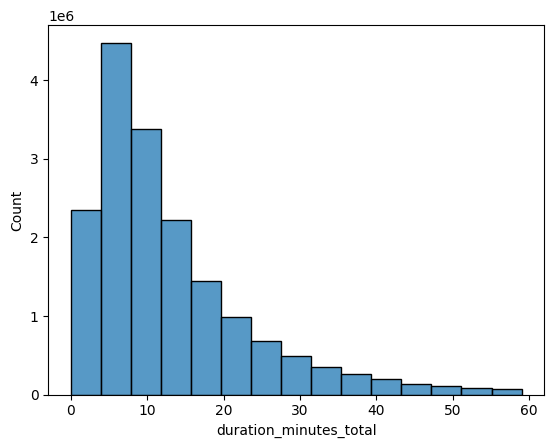

In [8]:
sns.histplot(data=df, x='duration_minutes_total', bins=15)

<Axes: xlabel='distance', ylabel='Count'>

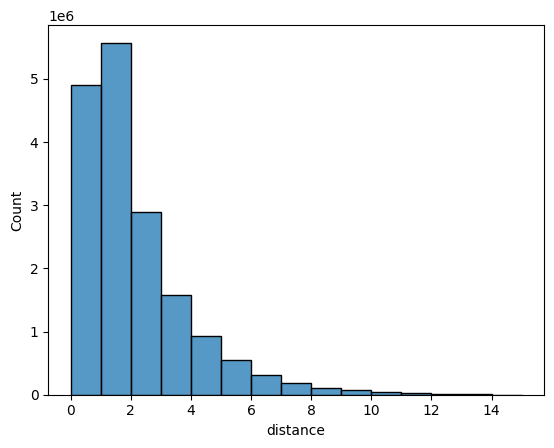

In [13]:
sns.histplot(data=df, x='distance', bins=15)

In [5]:
df.groupby(by='rideable_type')['ride_id'].count()

rideable_type
classic_bike     8984292
docked_bike      3107539
electric_bike    8675346
Name: ride_id, dtype: int64

In [6]:
df.groupby(by='rideable_type')['money'].sum()

rideable_type
classic_bike     18214447.72
docked_bike             0.00
electric_bike    39788117.62
Name: money, dtype: float64

In [7]:
df.groupby(by=['rideable_type', 'member_casual'])['ride_id'].count()

rideable_type  member_casual
classic_bike   casual           3124192
               member           5860100
docked_bike    casual           1665653
               member           1441886
electric_bike  casual           3592639
               member           5082707
Name: ride_id, dtype: int64

In [9]:
df.groupby(by=['rideable_type', 'member_casual'])['money'].sum()

rideable_type  member_casual
classic_bike   casual           17305335.04
               member             909112.68
docked_bike    casual                  0.00
               member                  0.00
electric_bike  casual           29500603.72
               member           10287513.90
Name: money, dtype: float64

In [2]:
df = pd.read_parquet('E:/bd_project/data.parquet')

df = df.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name', 'start_lat', 'end_lat', 
                        'start_lng', 'end_lng', 'temperature_2m_max', 'temperature_2m_min', 
                        'apparent_temperature_max', 'apparent_temperature_min', 'duration_hours', 'duration_minutes', 
                        'duration_seconds'])

df = df.drop(columns = ['weather_code', 'temperature_2m_mean', 'apparent_temperature_mean', 'daylight_duration', 
                        'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 
                        'wind_speed_10m_max', 'day_name', 'day', 'year_month_day', 'is_weekend', 'is_holiday', 'duration'])

df = df[df['rideable_type'] != 'docked_bike']

gr = df.groupby(by=['year_month', 'member_casual', 'rideable_type'], as_index=False).agg({'ride_id':'count', 'month':'first', 
                                                                                          'year':'first', 'season_name':'first', 
                                                                                          'distance':'mean', 'duration_minutes_total':'mean', 
                                                                                          'money':'sum'})

gr['year_month'] = gr['year_month'].astype(str) + '-01'




In [ ]:
gr.to_csv('data_by_month.csv', index=False)

In [8]:
gr = df.groupby(by=['year_month', 'member_casual', 'rideable_type'], as_index=False).agg({'ride_id':'count', 'month':'first', 
                                                                                          'year':'first', 'season_name':'first', 
                                                                                          'distance':'mean', 'duration_minutes_total':'mean', 
                                                                                          'money':'sum'})



In [9]:
gr

,year_month,member_casual,rideable_type,ride_id,month,year,season_name,distance,duration_minutes_total,money
0,2020-04,casual,docked_bike,23628,4,2020,Лето,1.983208,42.653293,0.00
1,2020-04,member,docked_bike,61148,4,2020,Лето,2.162345,18.527638,0.00
2,2020-05,casual,docked_bike,86909,5,2020,Лето,2.046706,45.818086,0.00
3,2020-05,member,docked_bike,113365,5,2020,Лето,2.317661,20.254320,0.00
4,2020-06,casual,docked_bike,154718,6,2020,Осень,2.196064,44.260403,0.00
...,...,...,...,...,...,...,...,...,...,...
216,2024-02,member,electric_bike,63498,2,2024,Весна,2.235680,10.400753,118876.86
217,2024-03,casual,classic_bike,39614,3,2024,Лето,1.899310,26.740218,230285.66
218,2024-03,casual,electric_bike,42936,3,2024,Лето,1.903035,12.873766,286145.12
219,2024-03,member,classic_bike,108970,3,2024,Лето,1.818817,11.896439,13695.30


In [3]:
df = df[df['rideable_type'] != 'docked_bike']

In [16]:
def season(month):

    if month == 12 or month < 3:
        return "Зима"
    elif month < 6:
        return "Весна"
    elif month < 9:
        return "Лето"
    else:
        return "Осень"

df['season_name'] = df['month'].apply(season)

In [5]:
d = {'Monday':'Понедельник', 'Tuesday':'Вторник', 'Wednesday':'Среда', 'Thursday':'Четверг', 'Friday':'Пятница', 'Saturday':'Суббота', 'Sunday': 'Воскресенье'}

df['day_name'] = df['day_name'].replace(d)

In [6]:
def dnumber(day):
    if day == 'Понедельник':
        return 1
    elif day == 'Вторник':
        return 2
    elif day == 'Среда':
        return 3
    elif day == 'Четверг':
        return 4
    elif day == 'Пятница':
        return 5
    elif day == 'Суббота':
        return 6
    elif day == 'Воскресенье':
        return 7

df['week_day_number'] = df['day_name'].apply(dnumber)

In [17]:
def season_number(season):
    if season == 'Зима':
        return 1
    elif season == 'Весна':
        return 2
    elif season == 'Лето':
        return 3
    elif season == 'Осень':
        return 4
    
df['season_number'] = df['season_name'].apply(season_number)

In [8]:
df = df.drop(columns=['started_at', 'ended_at', 'start_station_name', 'end_station_name', 'start_lat', 'end_lat', 
                        'start_lng', 'end_lng', 'temperature_2m_max', 'temperature_2m_min', 
                        'apparent_temperature_max', 'apparent_temperature_min', 'duration_hours', 'duration_minutes', 
                        'duration_seconds'])


In [9]:
df = df.drop(columns = ['daylight_duration', 
                        'sunshine_duration', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours'])

In [9]:
ymdg = df.groupby(by='year_month_day', as_index=False).agg({'ride_id':'count', 'weather_code':'median', 'temperature_2m_mean':'mean', 
                                            'apparent_temperature_mean':'mean', 'daylight_duration':'mean',
                                            'sunshine_duration':'mean', 'precipitation_sum':'mean', 'rain_sum':'mean', 'snowfall_sum':'mean',
                                            'wind_speed_10m_max':'mean', 'day_name':'first', 'day':'first', 'month':'first', 'year':'first', 
                                            'month_day':'first', 'year_month':'first', 'year_month_day':'first', 'season':'first', 'season_name':'first', 
                                            'is_weekend':'first', 'is_holiday':'first','distance':'mean', 'duration_minutes_total':'mean', 'money':'sum'})

In [11]:
ymd = ymdg.pop('year_month_day') 
  
ymdg.insert(0, 'year_month_day', ymd) 

In [42]:
ymdg = ymdg.drop(columns='level_0')

In [45]:
ymdg.to_csv('bike_data_daily.csv', index=False)

In [44]:
ymdg

,index,year_month_day,ride_id,weather_code,temperature_2m_mean,apparent_temperature_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,wind_speed_10m_max,day_name,day,month,year,month_day,year_month,season,season_name,is_weekend,is_holiday,distance,duration_minutes_total,money
0,0,2020-04-01,2294,3.0,3.825834,0.185996,45863.330,39464.850,0.0,0.0,0.0,5.371220,Wednesday,1,4,2020,04-01,2020-04,2,Лето,0,0,2.042587,19.708806,0.00
1,1,2020-04-02,2608,3.0,4.298750,1.709177,46028.760,42652.215,0.0,0.0,0.0,4.427188,Thursday,2,4,2020,04-02,2020-04,2,Лето,0,0,2.062935,21.528758,0.00
2,2,2020-04-03,3532,51.0,9.563333,7.157852,46193.426,39600.000,0.1,0.1,0.0,5.208646,Friday,3,4,2020,04-03,2020-04,2,Лето,0,0,2.165793,27.076161,0.00
3,3,2020-04-04,2288,53.0,5.521666,1.740387,46358.402,25055.220,2.4,2.4,0.0,5.994164,Saturday,4,4,2020,04-04,2020-04,2,Лето,1,0,2.157244,21.716783,0.00
4,4,2020-04-05,2887,2.0,3.194583,-0.919664,46523.660,42845.406,0.0,0.0,0.0,5.326349,Sunday,5,4,2020,04-05,2020-04,2,Лето,1,0,2.187309,26.122965,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,2024-03-27,9763,3.0,1.809167,-4.273266,45027.133,38660.734,0.0,0.0,0.0,8.200000,Wednesday,27,3,2024,03-27,2024-03,2,Лето,0,0,1.833353,10.642016,17382.42
1455,1455,2024-03-28,11934,3.0,3.419583,-1.242563,45196.406,35451.074,0.0,0.0,0.0,7.595393,Thursday,28,3,2024,03-28,2024-03,2,Лето,0,0,1.932239,12.440925,27846.02
1456,1456,2024-03-29,10518,63.0,3.502917,-0.693751,45364.970,39345.770,5.2,5.2,0.0,5.907622,Friday,29,3,2024,03-29,2024-03,2,Лето,0,0,1.900370,13.211067,26835.20
1457,1457,2024-03-30,10501,63.0,8.298749,4.930227,45532.710,38856.880,6.2,6.2,0.0,7.158911,Saturday,30,3,2024,03-30,2024-03,2,Лето,1,0,2.078687,16.345205,34599.62


In [11]:
df = df[df['price'].notna()]
df['index'] = list(range(len(df)))
df = df.set_index(df['index'])
df = df.drop(columns='index')

In [5]:
df = df[['ride_id', 'rideable_type', 'member_casual', 'day_name', 'day', 'month', 'year', 'month_day',
       'year_month', 'year_month_day', 'season', 'season_name', 'duration_minutes_total', 'price']]

In [29]:
ymg = df.groupby(by='year_month', as_index=False)[['money', 'ride_id']].agg({'money':'sum', 'ride_id':'count'})

In [43]:
ymg2 = df[df['member_casual'] == 'member'].groupby(by='year_month', as_index=False)[['money', 'ride_id']].agg({'money':'sum', 'ride_id':'count'})

In [45]:
ymg3 = df[df['member_casual'] == 'casual'].groupby(by='year_month', as_index=False)[['money', 'ride_id']].agg({'money':'sum', 'ride_id':'count'})

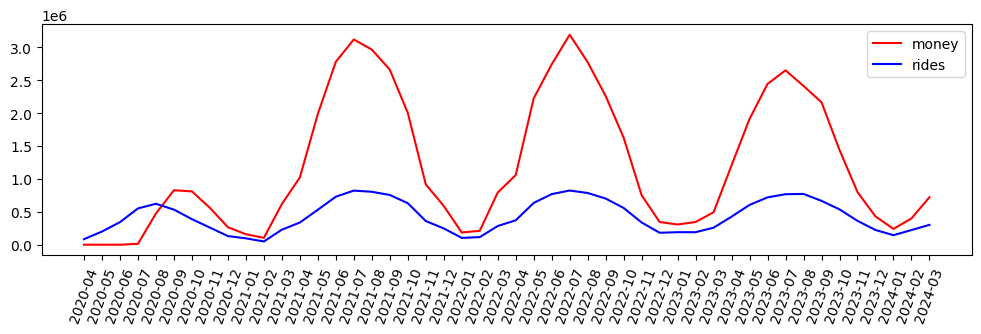

In [42]:
ymg = pd.DataFrame(ymg, columns = ['year_month', 'money', 'ride_id'])

fig, ax = plt.subplots(figsize=(12,3))
plt.plot(ymg['year_month'], ymg['money'], 'r', label='money')
plt.plot(ymg['year_month'], ymg['ride_id'], 'b', label='rides')
plt.xticks(rotation=70)
plt.legend()


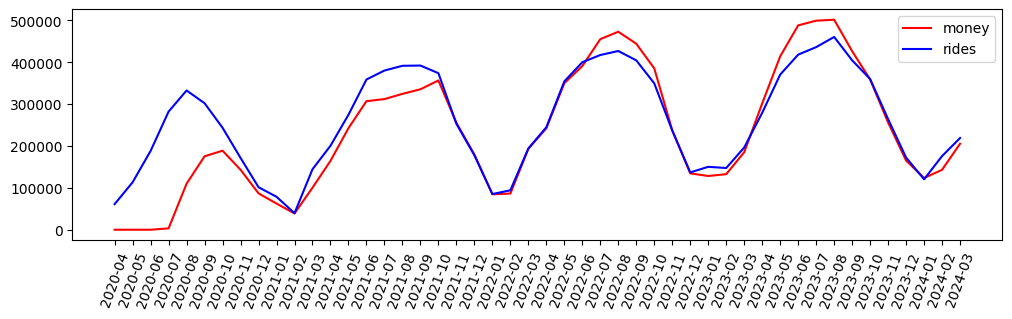

In [44]:
ymg2 = pd.DataFrame(ymg2, columns = ['year_month', 'money', 'ride_id'])

fig, ax = plt.subplots(figsize=(12,3))
plt.plot(ymg2['year_month'], ymg2['money'], 'r', label='money')
plt.plot(ymg2['year_month'], ymg2['ride_id'], 'b', label='rides')
plt.xticks(rotation=70)
plt.legend()

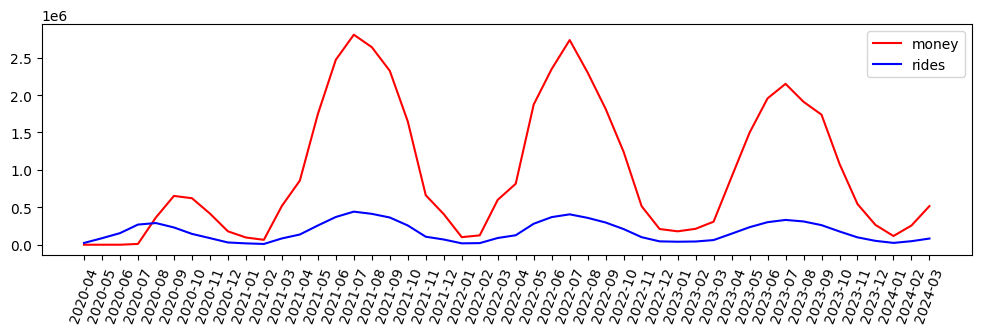

In [46]:
ymg3 = pd.DataFrame(ymg3, columns = ['year_month', 'money', 'ride_id'])

fig, ax = plt.subplots(figsize=(12,3))
plt.plot(ymg3['year_month'], ymg3['money'], 'r', label='money')
plt.plot(ymg3['year_month'], ymg3['ride_id'], 'b', label='rides')
plt.xticks(rotation=70)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Месяц')

19:38:01 - cmdstanpy - INFO - Chain [1] start processing
19:38:01 - cmdstanpy - INFO - Chain [1] done processing


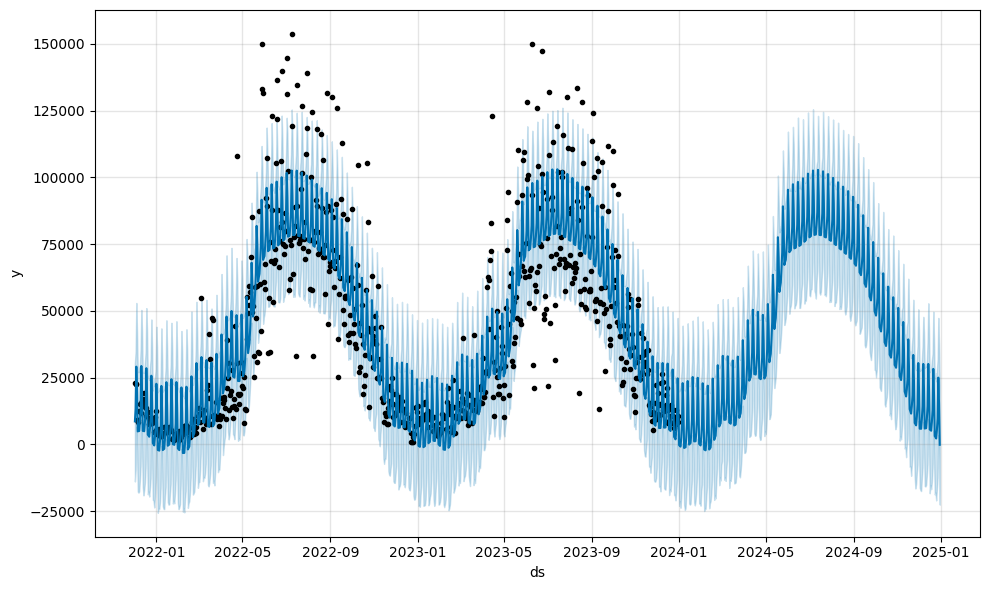

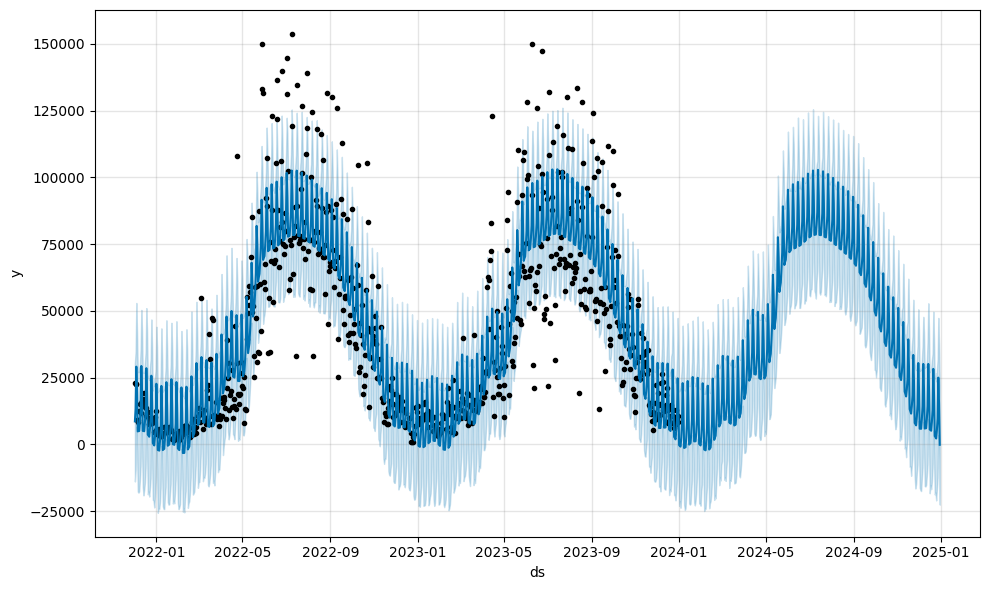

In [4]:
gr = df.groupby(by='year_month_day', as_index=False)['price'].agg({'price':'sum'})
gr['year_month_day'] = pd.to_datetime(gr['year_month_day'], format = '%Y-%m-%d')
gr = gr[gr['year_month_day'] < '2024-01-01']
gr = gr[gr['year_month_day'] > '2021-12-01']

gr['ds'] = gr['year_month_day']
gr['y'] = gr['price']
gr = gr.drop(columns=['year_month_day', 'price'])
p = Prophet()

p.fit(gr)

future = p.make_future_dataframe(periods=365)
forecast = p.predict(future)

p.plot(forecast)

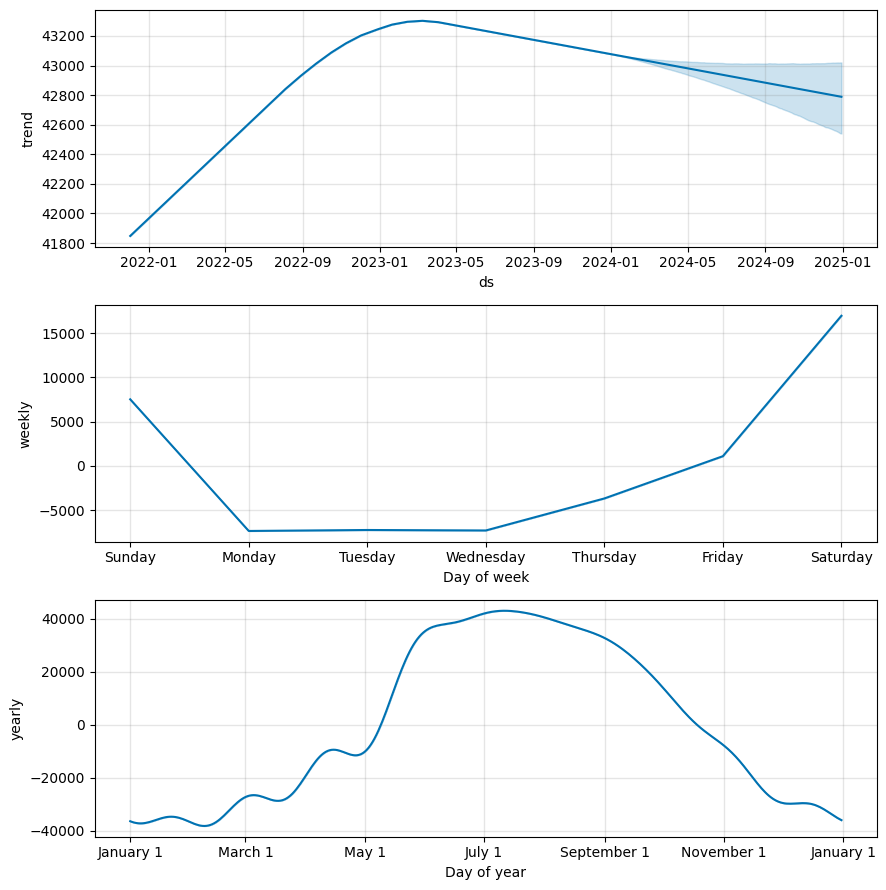

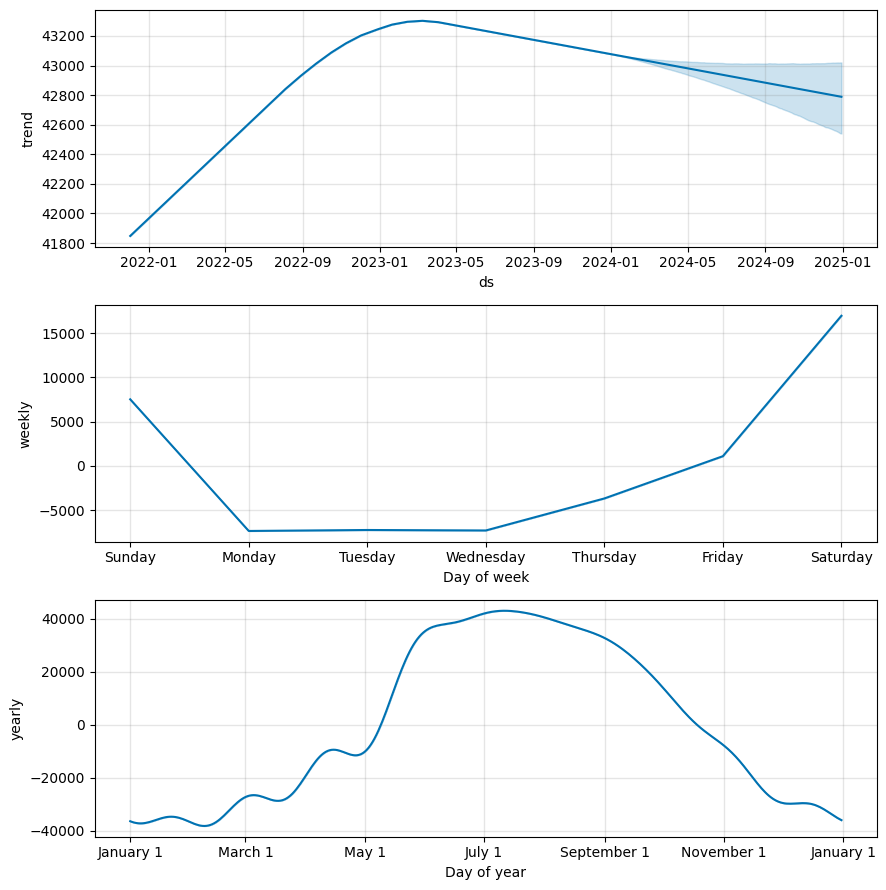

In [5]:
p.plot_components(forecast)

17:52:27 - cmdstanpy - INFO - Chain [1] start processing
17:52:27 - cmdstanpy - INFO - Chain [1] done processing


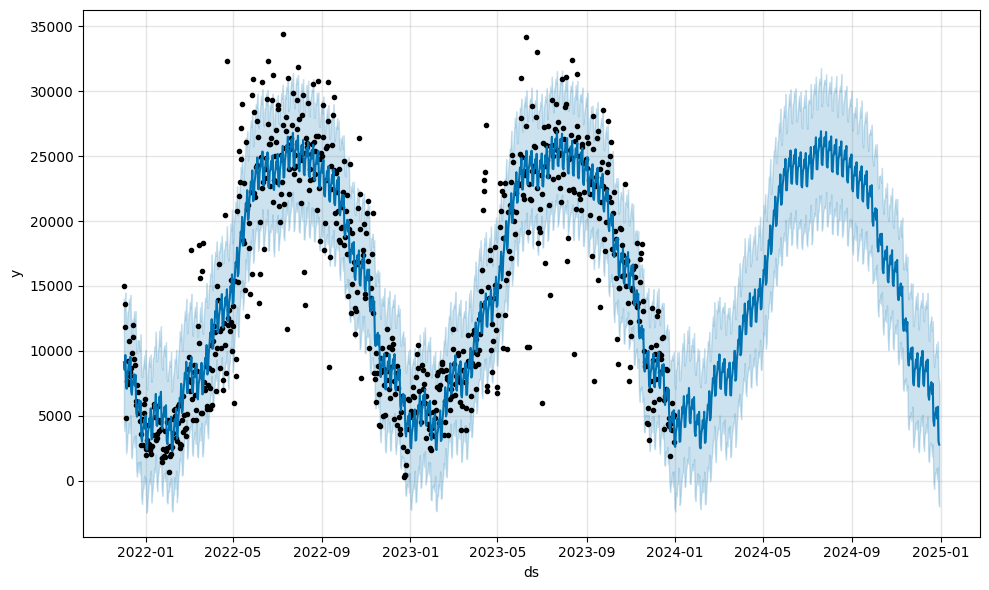

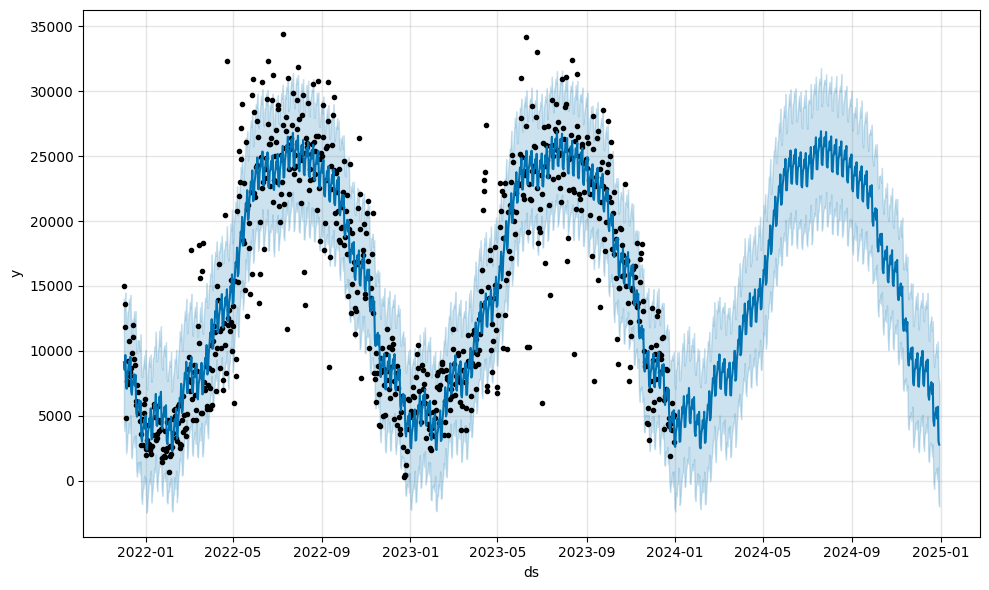

In [49]:
gr = df.groupby(by='year_month_day', as_index=False)['ride_id'].agg({'ride_id':'count'})
gr['year_month_day'] = pd.to_datetime(gr['year_month_day'], format = '%Y-%m-%d')
gr = gr[gr['year_month_day'] < '2024-01-01']
gr = gr[gr['year_month_day'] > '2021-12-01']

gr['ds'] = gr['year_month_day']
gr['y'] = gr['ride_id']
gr = gr.drop(columns=['year_month_day', 'ride_id'])
p = Prophet()

p.fit(gr)

future = p.make_future_dataframe(periods=365)
forecast = p.predict(future)

p.plot(forecast)

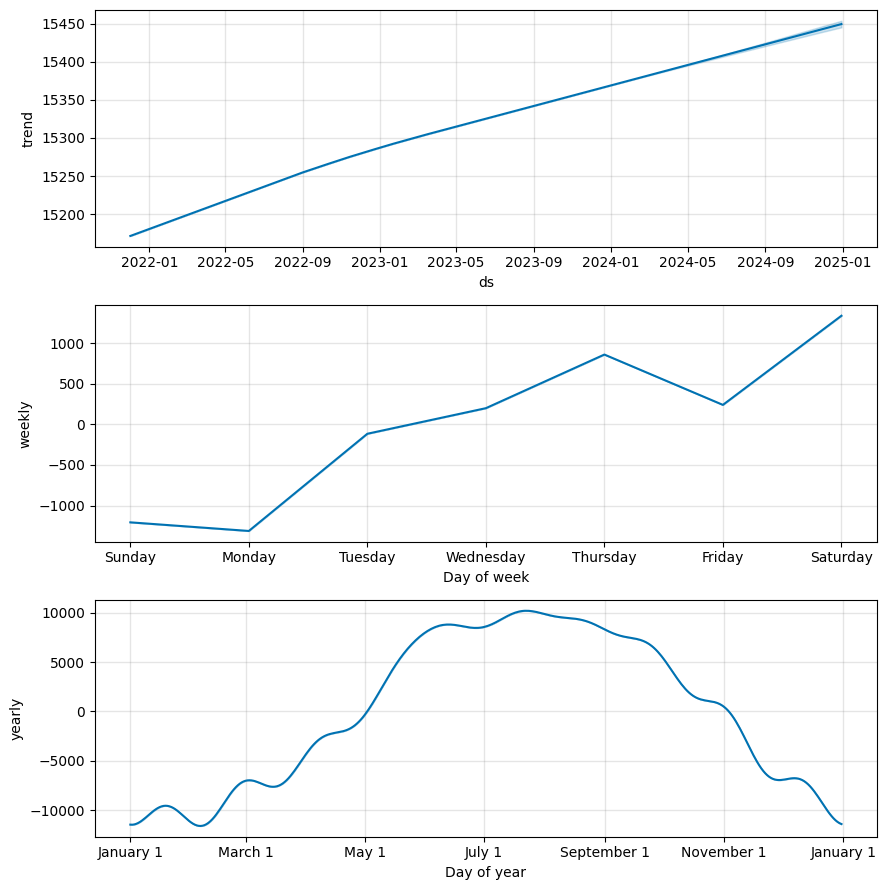

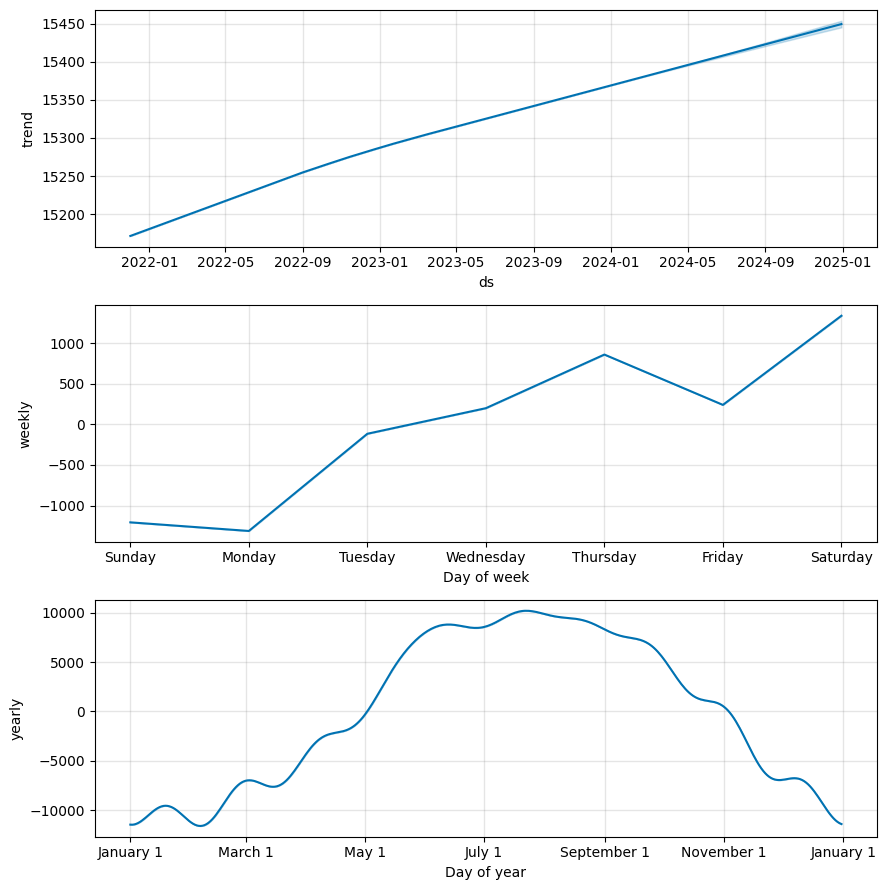

In [50]:
p.plot_components(forecast)